## Exam of Numerical methods, 25/01/2024.

### Exercise 1

Consider a square potential of width w and height V. Using Schrodinger equation it is possible to show that the energy levels $E_n$ of a quantum particle of mass $m$ inside the well satisfy the relations:

\begin{equation}
\tan{\sqrt{w^2 m E_n / 2 \hbar^2}} = \sqrt{ {(V-E_n)/E_n} }, \;\;\; n = 0,2,4,\ldots
\end{equation}
\begin{equation}
\tan{\sqrt{w^2 m E_n / 2 \hbar^2}} = -\sqrt{ {E_n/(V-E_n)} }, \;\;\; n = 1,3,5,\ldots
\end{equation}

Consider an electron (${m = 0.51 \times 10^6 / c^2}$ eV, $c = 3 \times 10^8 \, {\rm m/s}$) in a well with $V = 20$ eV and $w = 10^{-9}$ m. For the reduced Planck constant take the value $\hbar = 6.582 \times 10^{-16}$ eV s

\begin{enumerate}

\item Plot on the same graph the three functions $y_1 = \tan{\sqrt{w^2 m E / 2 \hbar^2}}$, $y_2 = \sqrt{ {(V-E)/E} }$, $y_3 = -\sqrt{ {E/(V-E)} }$, from $E = 0$ to $E = 6$ eV. You can use this plot to get a by eye estimate of the energy levels.

\item Calculate the values of $E_n$, for $n = 0,1,2,3$, to an accuracy of $0.001$ eV.

\end{enumerate}

n=0, E (eV) = 0.3189
n=1, E (eV) = 1.2739
n=2, E (eV) = 2.8597
n=3, E (eV) = 5.0656


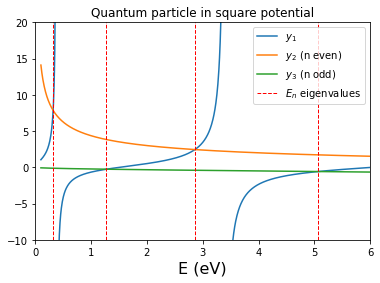

In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

c = 3e8              # Speed of light m/s
m = 0.51e6/(c**2)    # Electron's mass in eV
V = 20.              # Potential well's depth
w = 1e-9             # Potential well's width
hbar = 6.582e-16

# Defining functions y1, y2, y3
def f1(E): return np.tan(np.sqrt(w**2*m*E/(2.*hbar**2)))
def f2(E): return np.sqrt( (V-E)/E )
def f3(E): return - np.sqrt( E/(V-E) )


# Computing y1, y2, y3 in a set of values in the range [0,20] eV
energies = np.linspace(0.1,6.,1000)

y1 = f1(energies)
# This line below is a trick to tell pyplot not to connect points on opposite sides of the vertical asymptotes of tan
y1[:-1][np.diff(y1) < 0] = np.nan
y2 = f2(energies)
y3 = f3(energies)
    
# Plotting y1,y2,y3
plt.plot(energies,y1,label='$y_1$')
plt.plot(energies,y2,label='$y_2$ (n even)')
plt.plot(energies,y3,label='$y_3$ (n odd)')
#plt.xscale('log')
plt.xlim(0,6)
plt.ylim(-10,20)
plt.xlabel('E (eV)',fontsize=16)

# Finding roots using the bisection method.
# Use the plot to understand how to bracket the solution in each case
def En_even(E): return f1(E) - f2(E)
def En_odd(E): return f1(E) - f3(E)

# n = 0
a = 0.01
b = 0.35 
root0 = opt.bisect(En_even,a,b,xtol=1e-4)
print('n=0, E (eV) =',"{:.4f}".format(root0))

# n = 1
a = 0.5
b = 2.
root1 = opt.bisect(En_odd,a,b,xtol=1e-4)
print('n=1, E (eV) =', "{:.4f}".format(root1))

# n = 2
a = 2.5
b = 3.
root2 = opt.bisect(En_even,a,b,xtol=1e-4)
print('n=2, E (eV) =', "{:.4f}".format(root2))

# n = 3
a = 3.5
b = 7.
root3 = opt.bisect(En_odd,a,b,xtol=1e-4)
print('n=3, E (eV) =', "{:.4f}".format(root3))

# Plotting vertical lines in correspondence of the solutions
plt.axvline(x=root0,linestyle='dashed',color='red',lw=1, label = "$E_n$ eigenvalues")
plt.axvline(x=root1,linestyle='dashed',color='red',lw=1)
plt.axvline(x=root2,linestyle='dashed',color='red',lw=1)
plt.axvline(x=root3,linestyle='dashed',color='red',lw=1)
plt.title("Quantum particle in square potential")
plt.legend()
plt.show()

### Exercise 2

Consider the following ODE (van der Pol oscillator):

$\large\frac{d^2 x}{d t^ 2} - \mu (1 - x^2)\frac{dx}{dt} + \omega^2 x = 0$

Take $\omega = 1$ and $\mu = 0.1$ (small $\mu$ limit. Initial conditions: $x = 1$ and ${dx/dt = 0}$.


- Solve the equation numerically and plot the solutions $x(t)$, ${dx/dt}$, as functions of t, from $t=0$ to $t=100$

- For the solution derived above, make now a phase space plot, i.e., plot dx/dt ("velocity") on the y-axis vs. $x(t)$ on the x-axis

- Solve again the equation with the same values of $\omega = 1$ and $\mu = 0.1$, but change initial conditions to $x = 3$ and ${dx/dt = 2}$. Make again the three plots required in the previous two points, overplotting the new solutions to the previous ones. You should verify that at large $t$ the curves converge to the same solution (attractor).

- Find the solution and make the same plots again, but now for the case $\mu = 10$ (large $\mu$ limit), leaving $\omega$ and setting initial conditions again to $x = 1$ and ${dx/dt = 0}$.

Make sure to choose a small enough step to get accurate and smooth phase space plots.

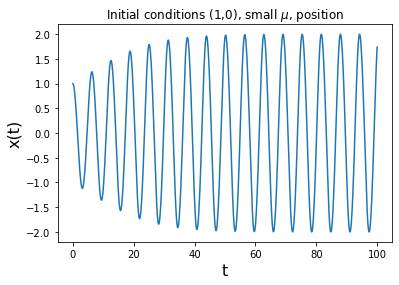

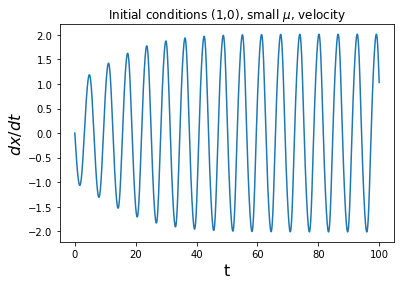

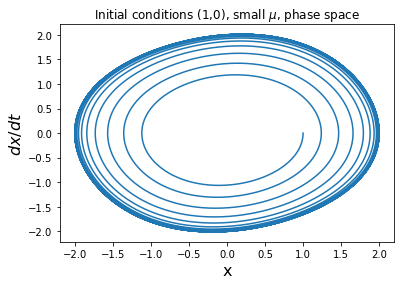

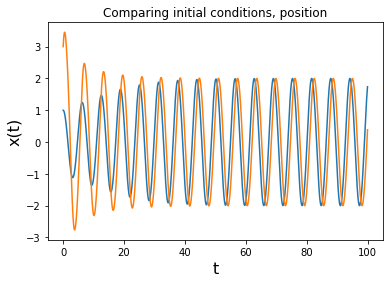

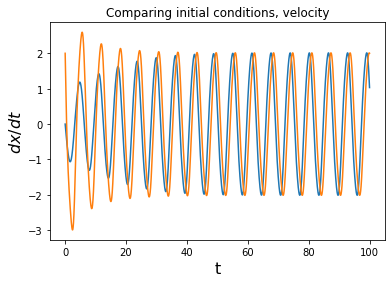

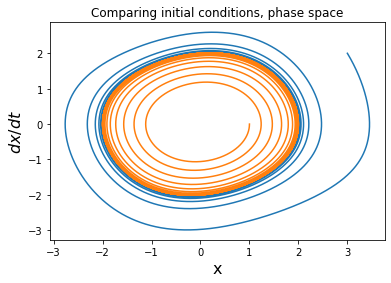

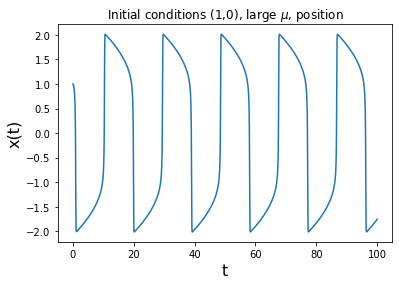

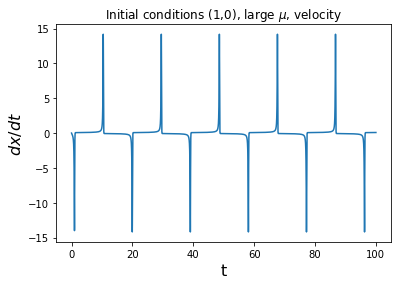

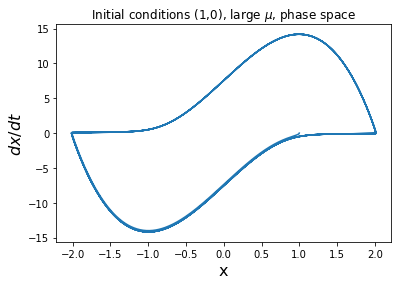

In [3]:
import numpy as np
import scipy as sp
from scipy import integrate
import matplotlib.pyplot as plt

# Turning 2nd order equation into system of 2 first order ODES
# Function computing the vector of derivatives: the list "params" contains the values of mu and omega.     """
#    Definisce il sistema di equazioni differenziali:
    
#    x1' = x2
 #   x2' = μ (1 - x1^2) x2 - ω^2 x1
    
 #   dove:
 #   - x1 è la posizione
 #   - x2 è la velocità
  #  - μ controlla il termine non lineare (smorzamento attivo)
  #  - ω è la frequenza naturale dell'oscillatore
    
def g(x,t,params):
    
    mu = params[0]
    omega = params[1]
    
    x1 = x[0]
    x2 = x[1]
    
    f0 = x2  # dx/dt = y
    f1 = mu*(1-x1**2)*x2 - omega**2*x1
    
    return np.array([f0,f1]) 

# Writing the function in a form which can be passed to scipy odeint
omega = 1.
mu = 0.1

def f(x,t): return g(x,t,params=[mu,omega])

# Times at which I evaluate the solution
tmin = 0.
tmax = 100.
h = 0.001
t = np.arange(tmin, tmax, h)

# Initial conditions
y0 = [1.,0.]
              
y = sp.integrate.odeint(f,y0,t) 

plt.title('Initial conditions (1,0), small $\mu$, position')
plt.plot(t,y[:,0])
plt.xlabel('t',size=16)
plt.ylabel('x(t)',size=16)
plt.show()
plt.title('Initial conditions (1,0), small $\mu$, velocity')
plt.plot(t,y[:,1])
plt.xlabel('t',size=16)
plt.ylabel('${dx/dt}$',size=16)
plt.show()        
          
plt.title('Initial conditions (1,0), small $\mu$, phase space')
plt.plot(y[:,0],y[:,1])
plt.xlabel('x',size=16)
plt.ylabel('${dx/dt}$',size=16)
plt.show()


# Initial conditions
y0 = [3.,2.]

y1 = sp.integrate.odeint(f,y0,t) 

plt.title('Comparing initial conditions, position')
plt.plot(t,y[:,0])
plt.plot(t,y1[:,0])
plt.xlabel('t',size=16)
plt.ylabel('x(t)',size=16)
plt.show()

plt.title('Comparing initial conditions, velocity')
plt.plot(t,y[:,1])
plt.plot(t,y1[:,1])
plt.xlabel('t',size=16)
plt.ylabel('${dx/dt}$',size=16)
plt.show()

plt.title('Comparing initial conditions, phase space')
plt.plot(y1[:,0],y1[:,1])
plt.plot(y[:,0],y[:,1])
plt.xlabel('x',size=16)
plt.ylabel('${dx/dt}$',size=16)
plt.show()


#Setting mu = 10
mu = 10.

y0 = [1.,0.]

def f(x,t): return g(x,t,params=[mu,omega])

y2 = sp.integrate.odeint(f,y0,t) 

plt.title('Initial conditions (1,0), large $\mu$, position')
plt.plot(t,y2[:,0])
plt.xlabel('t',size=16)
plt.ylabel('x(t)',size=16)
plt.show()

plt.title('Initial conditions (1,0), large $\mu$, velocity')
plt.plot(t,y2[:,1])
plt.xlabel('t',size=16)
plt.ylabel('${dx/dt}$',size=16)
plt.show()

plt.title('Initial conditions (1,0), large $\mu$, phase space')
plt.plot(y2[:,0],y2[:,1])
plt.xlabel('x',size=16)
plt.ylabel('${dx/dt}$',size=16)
plt.show()

